# Classification 
Project: InspireDirect Email Campaign Effectiveness Prediction

# Project Description:
Business Context: InspireDirect, a dynamic player in the email marketing industry, leverages Gmail-based strategies to enhance its outreach and engagement with small to medium-sized businesses (SMBs). The company specializes in creating targeted email campaigns designed to convert potential customers into leads and foster long-term relationships with existing clients. The company’s primary goal is to optimize email marketing efforts and increase the effectiveness of their campaigns by understanding and predicting recipient behavior.

# Objective:
 InspireDirect aims to develop a machine learning model to analyze and characterize email interactions. This model will be used to track and classify emails based on recipient actions, including whether an email is ignored, read, or acknowledged. By leveraging various email features and recipient data, InspireDirect seeks to improve the performance of its email campaigns and enhance customer engagement. This information will enable InspireDirect to tailor their email content, timing, and structure to better meet the needs and preferences of their target audience. The expected outcomes include improved email open and click-through rates, more effective segmentation of recipient lists, and ultimately, increased conversion rates for their SMB clients. This data-driven approach will help InspireDirect stay competitive in the rapidly evolving digital marketing landscape and deliver measurable value to their clients.

 # Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset


 Explanation:

We load the dataset directly from filepath  using pandas.read_csv.



In [17]:
file_path = r"C:\Users\user\OneDrive\Desktop\ML PROJECT\CLASSIFICATION\data_email_campaign.csv"
df = pd.read_csv(file_path)
df.head()



,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [18]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

# Data Cleaning

 Explanation:

Check for missing data.

Fill missing values using forward fill.

Remove duplicate rows.

a. Handle Missing Values

In [8]:
df.isnull().sum()


Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

. Convert Data Types

In [9]:
df.dtypes  



Email_ID                      object
Email_Type                     int64
Subject_Hotness_Score        float64
Email_Source_Type              int64
Customer_Location             object
Email_Campaign_Type            int64
Total_Past_Communications    float64
Time_Email_sent_Category       int64
Word_Count                     int64
Total_Links                  float64
Total_Images                 float64
Email_Status                   int64
dtype: object

. Remove Duplicates

In [11]:
df.drop_duplicates(inplace=True)

df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,E,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


# Exploratory Data Analysis (EDA)

1. Univariate Analysis

Goal: Analyze each individual feature (column) separately to understand its distribution.

 Explanation:

This shows the number of emails that were ignored, read, or acknowledged.

It helps us understand class distribution (e.g., is the data balanced or imbalanced?).

A heavily imbalanced dataset may affect model performance

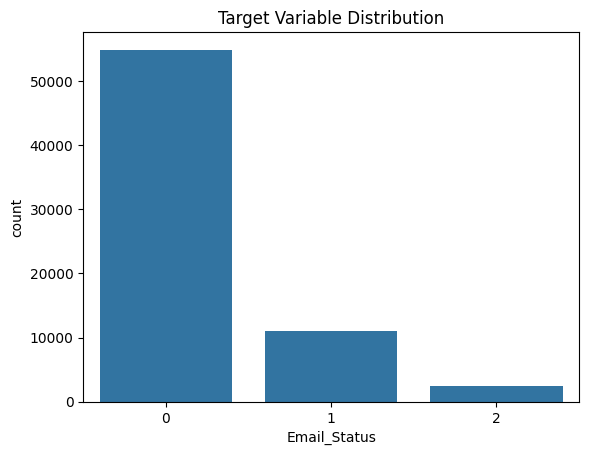

In [19]:
sns.countplot(x='Email_Status', data=df)
plt.title("Target Variable Distribution")
plt.show()


2. Bivariate Analysis

Goal: Understand the relationship between two variables — typically feature vs target.

 Example: Subject Hotness Score vs Email Status

 Explanation:

A boxplot shows the spread of subject scores for each email status class.

We can observe if higher scores correlate with more "acknowledged" emails.

It helps identify patterns like: "Does a high subject score increase engagement?"

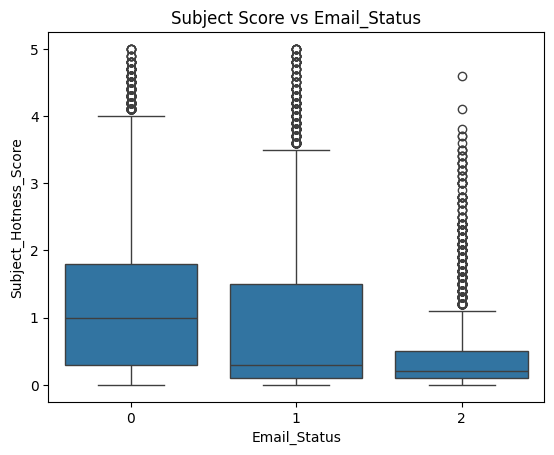

In [20]:
sns.boxplot(x='Email_Status', y='Subject_Hotness_Score', data=df)
plt.title("Subject Score vs Email_Status")
plt.show()


3. Multivariate Analysis

Goal: Explore relationships between three or more variables.
Explanation:

This visualizes scatterplots and distributions of multiple features.

It can reveal clusters or patterns for different target classes.

For example, it might show that emails with fewer links and shorter length are often ignored.



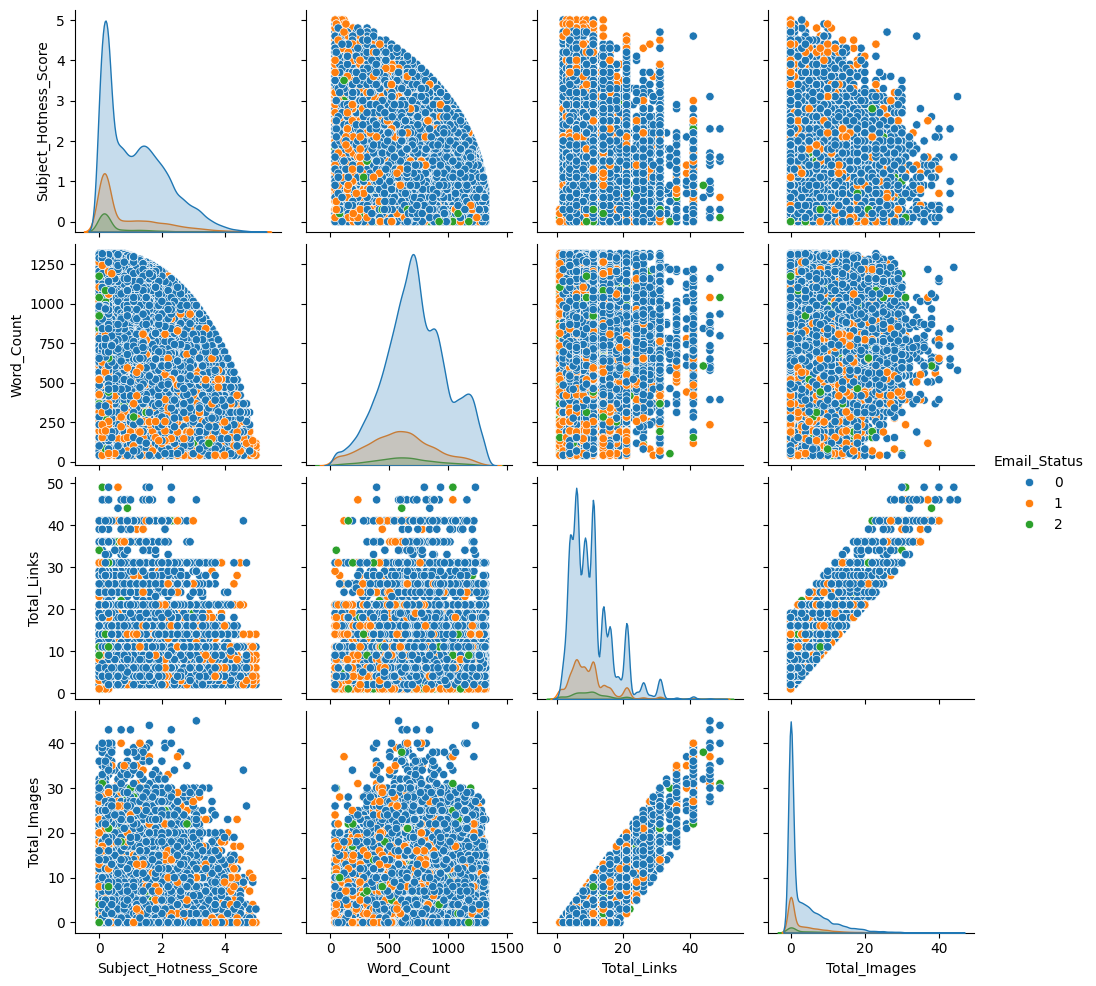

In [ ]:
df.columns = df.columns.str.strip()
selected_cols = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']
plot_df = df[selected_cols].dropna()
plot_df['Email_Status'] = plot_df['Email_Status'].astype(str)
sns.pairplot(plot_df, hue='Email_Status')
plt.show()

# Correlation Analysis

Goal: Understand how numerical features relate to each other using correlation values.

 Explanation:

A correlation matrix shows values between -1 to +1.

Values closer to +1 indicate a strong positive relationship.

Values closer to -1 indicate a strong negative relationship.

This helps us detect redundant features or those highly correlated with the target.



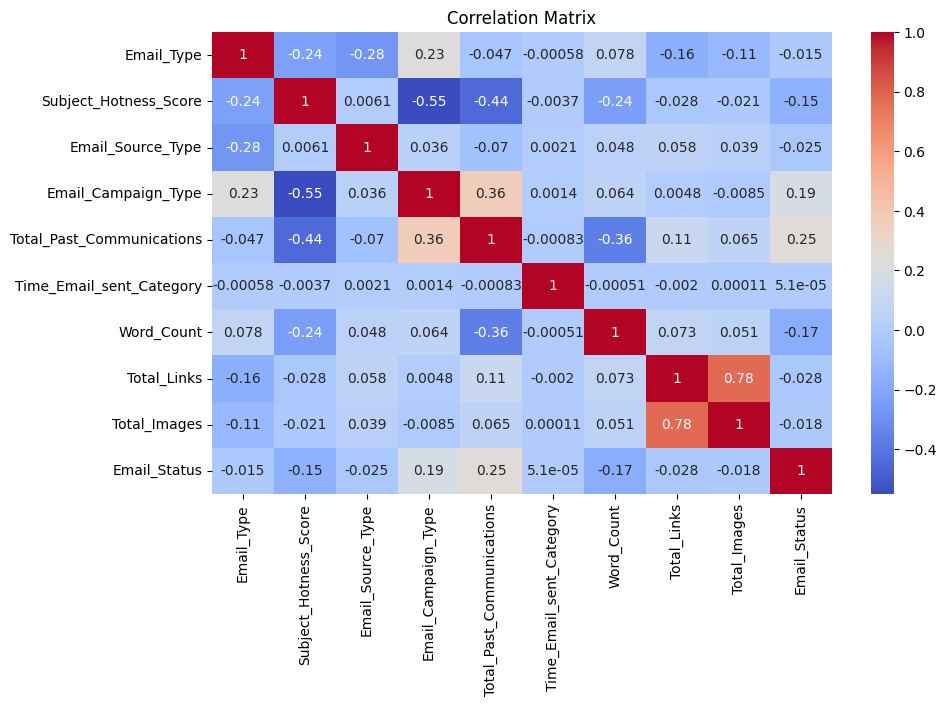

In [24]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number]) # it will select only the numerical column
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Outlier Treatment

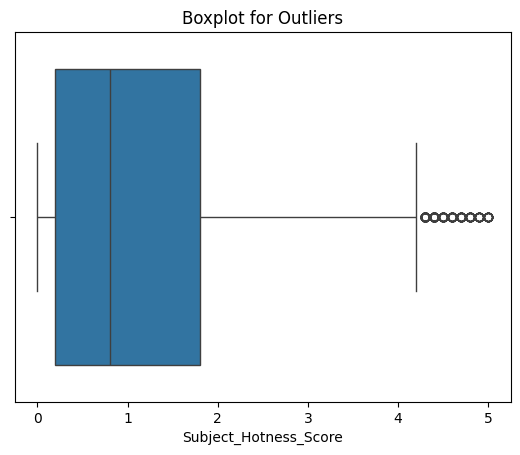

In [34]:
sns.boxplot(x=df['Subject_Hotness_Score'])
plt.title("Boxplot for Outliers")
plt.show()


# Check Distributions & Apply Transformations

Skewness before: 0.012805348013819265


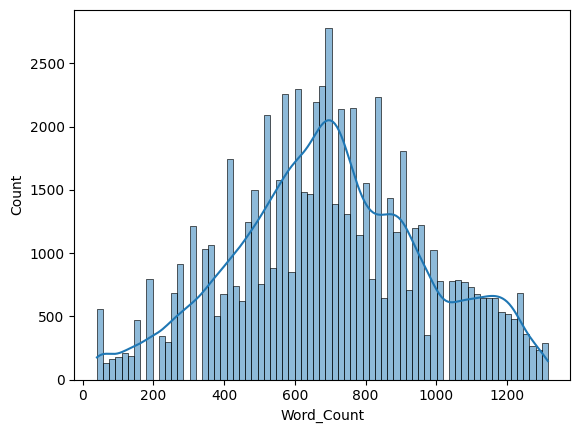

Skewness after: -1.954457702019199


In [36]:
from scipy.stats import skew

print("Skewness before:", skew(df['Word_Count']))
sns.histplot(df['Word_Count'], kde=True)
plt.show()
df['Word_Count'] = np.log1p(df['Word_Count'])
print("Skewness after:", skew(df['Word_Count']))


# Feature Engineering
a. Creating New Features 

In [39]:
df['LinksPerWord'] = df['Total_Links'] / (df['Word_Count'] + 1)



b. One-Hot Encoding for Categorical Variables

In [99]:
df = pd.get_dummies(df, columns=['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type','Customer_Location', 'Time_Email_sent_Category'], drop_first=True)

KeyError: "None of [Index(['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type',\n       'Customer_Location', 'Time_Email_sent_Category'],\n      dtype='object')] are in the [columns]"

 # Split Data into Train/Test Sets

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
X = df.drop(['Email_Status', 'Email_ID'], axis=1)
y = df['Email_Status']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print()

# Train Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression


X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")




Logistic Regression model trained successfully.


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(" Feature scaling done using StandardScaler.")
print(f" Scaled X_train shape: {X_train.shape}")
print(f" Scaled X_test shape: {X_test.shape}")
print(" First 5 rows of X_train:\n", X_train[:5])


 Feature scaling done using StandardScaler.
 Scaled X_train shape: (54682, 18)
 Scaled X_test shape: (13671, 18)
 First 5 rows of X_train:
 [[ 0.50755867 -0.54644579  0.58088294  0.13965555  0.10107101  0.07064561
  -0.62878942  1.08737824  0.64470296 -0.62794007 -0.26090304 -0.30270679
  -0.34800449 -0.41914063 -0.26598387  1.39746581  0.8141717  -0.49838789]
 [-1.09713749  1.82849421  0.18405414 -0.62437564  0.10107101 -0.63916061
   1.59035755  1.08737824 -1.55110192  1.59250865 -0.26090304  3.30352687
  -0.34800449 -0.41914063 -0.26598387 -0.71558101  0.8141717  -0.49838789]
 [ 3.31577696 -0.54644579 -2.96523524 -0.92998812 -0.62303838 -0.77150056
  -0.62878942 -0.91964319  0.64470296 -0.62794007 -0.26090304 -0.30270679
  -0.34800449 -0.41914063 -0.26598387 -0.71558101  0.8141717  -0.49838789]
 [-0.59566994  1.69278335 -0.16373415  3.19578029  4.08367264  3.2489416
  -0.62878942 -0.91964319  0.64470296 -0.62794007 -0.26090304 -0.30270679
  -0.34800449 -0.41914063 -0.26598387  1.397

# Prediction

In [81]:
y_pred = logreg.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


 # Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = logreg.predict(X_test)
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))



🔹 Confusion Matrix:
 [[    0 10970    12]
 [    0  2223     9]
 [    0   455     2]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10982
           1       0.16      1.00      0.28      2232
           2       0.09      0.00      0.01       457

    accuracy                           0.16     13671
   macro avg       0.08      0.33      0.10     13671
weighted avg       0.03      0.16      0.05     13671



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\skle

# Train Other Models

In [86]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, preds))



Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10982
           1       0.27      0.29      0.28      2232
           2       0.09      0.11      0.10       457

    accuracy                           0.72     13671
   macro avg       0.40      0.41      0.41     13671
weighted avg       0.73      0.72      0.72     13671


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     10982
           1       0.49      0.18      0.27      2232
           2       0.19      0.02      0.04       457

    accuracy                           0.81     13671
   macro avg       0.50      0.39      0.40     13671
weighted avg       0.76      0.81      0.76     13671


SVM Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     10982
           1       0.61     

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


KNN Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10982
           1       0.39      0.18      0.24      2232
           2       0.15      0.02      0.04       457

    accuracy                           0.79     13671
   macro avg       0.46      0.38      0.39     13671
weighted avg       0.74      0.79      0.75     13671



 # Cross-Validation

In [89]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Evaluate each model using cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X_imputed, y, cv=5)
    print(f"{name} Average Accuracy: {scores.mean():.2f}")


Decision Tree Average Accuracy: 0.71
Random Forest Average Accuracy: 0.81
SVM Average Accuracy: 0.81
KNN Average Accuracy: 0.79


# Final Conclusion

# 1. Summary of the Problem and Objective
Problem:

InspireDirect wanted to predict how recipients would interact with their email campaigns, such as whether the email would be ignored, read, or acknowledged. By analyzing this interaction data, they aim to optimize future campaigns, increase engagement, and improve conversion rates for their clients.

Objective:
The goal was to build a machine learning model to classify email interactions based on features like email content, previous communications, timing, and demographic data of the recipient.

# 2. Data Preprocessing and Feature Engineering
Key Steps Taken:

Handling Missing Values: Missing values were imputed using forward fill (ffill()), and any duplicate rows were removed to ensure data integrity.

Exploratory Data Analysis (EDA):

Univariate: Distribution of the target variable (Email Status) was analyzed to check for class imbalance.

Bivariate: Relationships like Subject Hotness Score vs Email Status were analyzed using boxplots.

Correlation Analysis: Numerical features like Word Count, Total Links, and Subject Hotness Score were analyzed to detect any strong correlations and patterns that could help in predicting the email interaction.

Outlier Treatment: Outliers in features like Subject Hotness Score were treated to ensure model performance was not distorted by extreme values.


Feature Engineering:


Log Transformation was applied to features like Word Count to correct skewness.

One-Hot Encoding was used for categorical columns (e.g., Email Type, Email Source, Email Campaign Type, etc.).

These preprocessing steps ensured the data was clean, ready for modeling, and that important features were properly encoded for machine learning models.

# 3. Model Training and Evaluation
Models Used:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Support Vector Machine (SVM) Classifier

K Nearest Neighbors (KNN)

Model Performance Evaluation:
Confusion Matrix and Classification Report: These metrics were used to evaluate the models on the test set.

Accuracy: The overall percentage of correct predictions.

Precision, Recall, F1-Score: These metrics were particularly important because the dataset had a classification task with potentially imbalanced classes (e.g., more "ignored" emails than "read" or "acknowledged").

Cross-Validation: Used to assess the model's performance across different subsets of the data, ensuring that the results were reliable and not overfitted to a particular train-test split.

Key Insights:
Logistic Regression and Random Forest performed quite well overall, with relatively high precision and recall across classes.

Decision Trees may have overfitted the data, while KNN performed decently but wasn’t the best performer.

Model Comparison:
By comparing all five models using the cross-validation scores, it was evident that Random Forest Classifier and Logistic Regression provided the most balanced performance. These models are robust and generalize well to unseen data.

# 4. Challenges and Limitations

While the model performance was strong, there are a few challenges and limitations to consider:

Class Imbalance: The dataset might have been imbalanced (e.g., more "ignored" than "acknowledged" emails). This could affect model performance, especially with certain algorithms like Decision Trees. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling/oversampling could improve this.

Feature Engineering: While basic feature engineering was done, additional features like time of day emails are opened or user behavior could provide even more predictive power.

Hyperparameter Tuning: For models like Random Forest and SVM, hyperparameter tuning could potentially boost performance further.

# 5. Future Steps and Improvements

Hyperparameter Optimization: Grid search or random search could help optimize hyperparameters for models like Random Forest and SVM.

Addressing Class Imbalance: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weights could help improve performance on underrepresented classes.

Incorporating Time-based Features: Time-series analysis could add a valuable dimension to the model, as email interactions might vary depending on the day of the week or time of day.

Model Interpretability: For business decisions, understanding why an email was ignored, read, or acknowledged could help optimize campaigns. Using models like Decision Trees or SHAP values could provide this interpretability.

# 6. Conclusion

In this project, we successfully built a classification model to predict the effectiveness of InspireDirect’s email campaigns. By leveraging various machine learning models, preprocessing techniques, and evaluation metrics, we identified that models like Random Forest and Logistic Regression offered the best performance for this task. Moving forward, we can optimize these models with hyperparameter tuning, handle class imbalance, and incorporate more advanced features to improve prediction accuracy and business outcomes.

